# Mean Shift Demonstration
## What is it.

The MeanShift algorithm is used to detect "blob clusters" from a dataset. It's useful to detect any sample clusters and trends that happen in the dataset given to it.

In [27]:
import numpy as nump
import matplotlib.pyplot as plt
from itertools import cycle

# Import necessary implementations
from sklearn.cluster import MeanShift, estimate_bandwidth

# We'll use this to generate our sample data, later, we'll use a real-world data-set
from sklearn.datasets import make_blobs

## Sample Data Set-up

In [28]:
# Where our sample data will generate those centers around - The algorithm should find 4 blobs in this case.
blob_centers = [[1, 1], [1, -1], [-1, 1], [-1,-1]]
X, _ = make_blobs(n_samples=20000, centers=blob_centers, cluster_std=0.6)

## Usage of Mean Shift with Sample Data

In [38]:
est_band = estimate_bandwidth(X, quantile=0.2, n_samples=1500)

result_ms = MeanShift(bandwidth=est_band, bin_seeding=True)
result_ms.fit(X)

labels = result_ms.labels_
unique = nump.unique(labels)
centers = result_ms.cluster_centers_

centers_amt = len(centers)

print("Detected clusters: %d" % centers_amt )

Detected clusters: 4


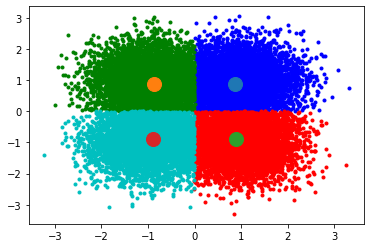

In [54]:
# begins a new figure
plt.figure(1)
# clear it
plt.clf()

# this will keep cycling colors, we'll use this to associate a color to the center
colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")

# k, being the index number of the centre, col, being the color associated (through zip) with the centre index
for k, col in zip(range(centers_amt), colors):
    members = labels == k
    cluster_center = centers[k]
    
    # Plot the sample points, the cluster dots.
    plt.plot(X[members, 0], X[members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markersize=14
    )
plt.show()
             